# Week3 授業課題 信用情報を分析しよう

## 【問題1】コンペティション内容の把握
以下の観点に気をつけて、どのようなコンペティションなのかレポートしてください。

- このコンペティションでは何を予測する？目的変数は？
- 企業がこのコンペティションを開催することで得られるメリットは？
- データセットを見る前の段階で考えられる予測結果に影響してきそうなことは？

- このコンペティションでは何を予測する？目的変数は？  
ローン（お金）を借りたい人の返済能力があるかを予測する。  
目的変数は"TARGET"
    - 1:返済困難なクライアント
    - 0:返済可能と考えられるクライアント


- 企業がこのコンペティションを開催することで得られるメリットは？  
過去の信用情報が不十分なクライアントに対しても、電話会社や取引情報などの様々な情報を用いて、返済が可能かを審査する仕組みを作ることができる。

- データセットを見る前の段階で考えられる予測結果に影響してきそうなことは？
    - 負債状況
    - 家族構成
    - 月々の電話代の支払い状況（支払い遅延等がないか）
    - 給料
    - 会社
    - 学歴
    - 職種
    

## 【問題2】データの概観
データの概観を把握してください。

（例）

- .head()、.info()、describe()などを使う
- 欠損値の有無を見る
- クラスごとのデータ数をグラフに出す
- コードと表・グラフだけではなく、結果に対する説明や考察も行ってください。

In [1]:
# モジュールをインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# application_train.csvの読み込み
df_train = pd.read_csv('application_train.csv')
df_train[:10]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#学習データの情報表示
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [3]:
#特徴量の要約統計量の表示
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [4]:
# 欠損値があるデータをカウント
Total = df_train.isnull().sum()
# 欠損値の割合を算出
missing_rate = Total / len(df_train)

#　テーブルにカウントした欠損値と割合を格納
missing_table = pd.DataFrame({
    'Total': Total,
    'missing_rate': missing_rate
})

#欠損値の割合が大きい順にソートする
missing_table.sort_values(by='missing_rate', ascending=False)

,Total,missing_rate
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_AVG,213514,0.694330
NONLIVINGAPARTMENTS_MEDI,213514,0.694330
FONDKAPREMONT_MODE,210295,0.683862
LIVINGAPARTMENTS_MODE,210199,0.683550
LIVINGAPARTMENTS_AVG,210199,0.683550
LIVINGAPARTMENTS_MEDI,210199,0.683550


In [5]:
# Targetごとのサンプル数を出力
df_train["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

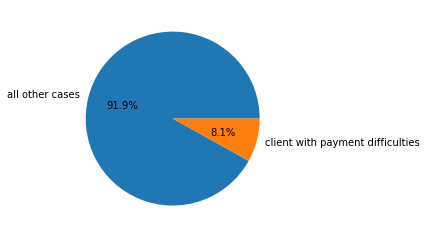

In [6]:
import matplotlib.pyplot as plt

#ラベルづけ
label = ['all other cases', 'client with payment difficulties']

# 円グラフを表示
#TODO:実数を入れたい
plt.pie(df_train['TARGET'].value_counts(), autopct="%1.1f%%", labels = label)

plt.show()

コードと表・グラフだけではなく、結果に対する説明や考察も行ってください。
    - 欠損値が多いため、データ処理、補填が必要
    - 返済可能な人の割合が大きい

## 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。


### テストデータから返済可能かを予測する
→ 課題・疑問になりそうなのは下記
- 欠損値の扱いについて削除を行うか、補填を行うか
- データの文字列の扱いについて検討が必要（数値に置き換えるか、使用しないか、、）
- 返済可能か、返済不可能か判断するための重要な特徴量はどれになるのか

## 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めましょう。過程で新しい疑問点などが生まれた場合は、加えていってください。

課題合格の条件として、表やグラフを 合計15個以上 出力してください。そして、それに対してマークダウンを使い考察を加えていきましょう。

まずは休んでしまったのでキャッチアップ。。。  
適当な特徴量をピックアップし散布図を作成してみる

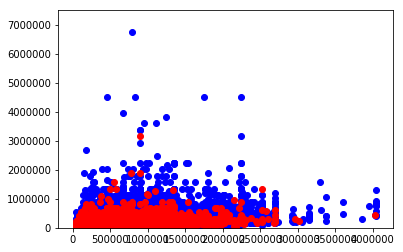

In [7]:
# それ以外のクライアントの収入
income_0 = df_train[df_train['TARGET'] == 0]['AMT_INCOME_TOTAL']
# 支払が困難なクライアントの収入
income_1 = df_train[df_train['TARGET'] == 1]['AMT_INCOME_TOTAL']

# それ以外のクライアントのクレジット額
credit_0 = df_train[df_train['TARGET'] == 0]['AMT_CREDIT']
# 支払が困難なクライアントのクレジット額
credit_1 = df_train[df_train['TARGET'] == 1]['AMT_CREDIT']

plt.ylim(0, 7500000)

# それ以外のクライアントの収入の散布図を出力(青)
plt.scatter(credit_0, income_0, c="b", marker="o")

# 支払が困難なクライアントの収入の散布図を出力(赤)
plt.scatter(credit_1, income_1, c="r", marker="o")

支払が困難なクライアントの方が収入が低いことが読み取れた  

特に重要度の高い他の特徴量に着目してみてみたいので、重要度をみてみる  
方針は下記でやってみる
- データの文字列の扱いについて検討が必要（数値に置き換えるか、使用しないか、、）  
→ 離散値に置き換える

In [8]:
import pandas as pd

# application_train.csvの読み込み
df_train = pd.read_csv('application_train.csv')

# object型の列一覧を取得
object_columns = df_train.select_dtypes(include=object).columns

from sklearn.preprocessing import LabelEncoder
# 文字列を離散値かできるみたいなので使ってみる
le = LabelEncoder()

# 各object型のcolumsを離散値か
for col in object_columns:
    # 変な値が入ったcolumsもあるので、例外だったらdropしちゃう
    try:
        le.fit(df_train[col])
        df_train[col] = le.transform(df_train[col])
    
    except TypeError:
        df_train = df_train.drop(col, axis=1)
        object_columns = object_columns.drop(col)
        
# 確認
df_train[object_columns]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,0,1,0,1,7,4,3,1,6,5
1,0,0,0,0,4,1,1,1,1,39
2,1,1,1,1,7,4,3,1,1,11
3,0,0,0,1,7,4,0,1,6,5
4,0,1,0,1,7,4,3,1,4,37
5,0,1,0,1,4,4,1,1,6,33
6,0,0,1,1,1,1,1,1,3,5
7,0,1,1,1,4,1,1,1,1,33
8,0,0,0,1,3,4,1,1,6,57
9,1,1,0,1,7,4,3,1,4,9


できてそう  
次に
- 欠損値の扱いについて削除を行うか、補填を行うか  
→ 中央値で補填する

In [9]:
#  欠損を中央値で埋める
df_train = df_train.fillna(df_train.median())

# 欠損値があるデータをカウント
Total = df_train.isnull().sum()
# 欠損値の割合を算出
missing_rate = Total / len(df_train)

#　テーブルにカウントした欠損値と割合を格納
missing_table = pd.DataFrame({
    'Total': Total,
    'missing_rate': missing_rate
})

#欠損値の割合が大きい順にソートする
missing_table.sort_values(by='missing_rate', ascending=False)

,Total,missing_rate
SK_ID_CURR,0,0.0
YEARS_BUILD_MEDI,0,0.0
OBS_30_CNT_SOCIAL_CIRCLE,0,0.0
TOTALAREA_MODE,0,0.0
NONLIVINGAREA_MEDI,0,0.0
NONLIVINGAPARTMENTS_MEDI,0,0.0
LIVINGAREA_MEDI,0,0.0
LIVINGAPARTMENTS_MEDI,0,0.0
LANDAREA_MEDI,0,0.0
FLOORSMIN_MEDI,0,0.0


これもできてそう

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 116 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(51)
memory usage: 272.2 MB


重要度の高いものをpickupしてみる  

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# 説明変数
X = df_train.drop(['SK_ID_CURR', 'TARGET'], axis = 1)

# 目的変数
y = df_train['TARGET']

# 分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# インスタンス作成
regr = RandomForestRegressor(n_estimators = 10)

# 学習
regr = regr.fit(X_test, y_test)

# 重要度取得
feature_importance = regr.feature_importances_

# 重要度格納用
ser_feature_importance = pd.Series([])

# 重くなるのでテストデータで実施
for i, key in enumerate(X_test):
    ser_feature_importance[key] = feature_importance[i]

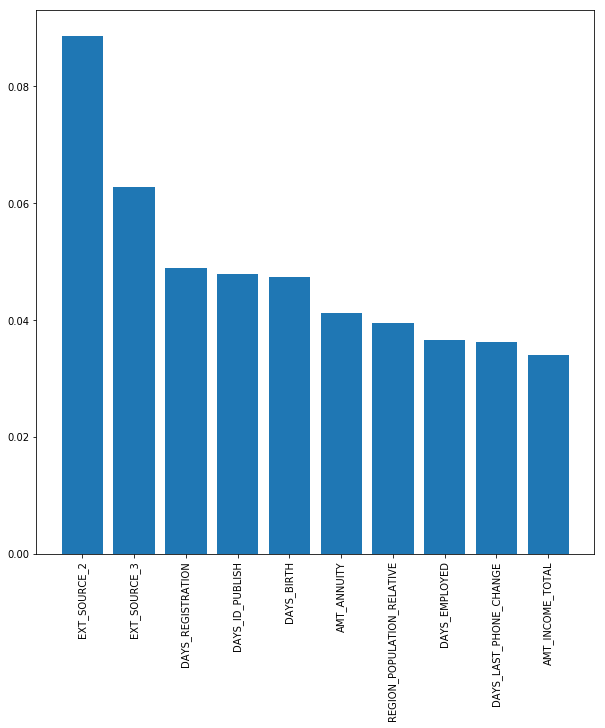

In [12]:
# 重要度上位10
high_importance = ser_feature_importance.sort_values(ascending = False)[:10]

# 可視化
plt.figure(figsize=(10,10))
plt.bar(high_importance.index, high_importance.values)
plt.xticks(high_importance.index, rotation=90)
plt.show()

各特徴量の相関係数を可視化してみる

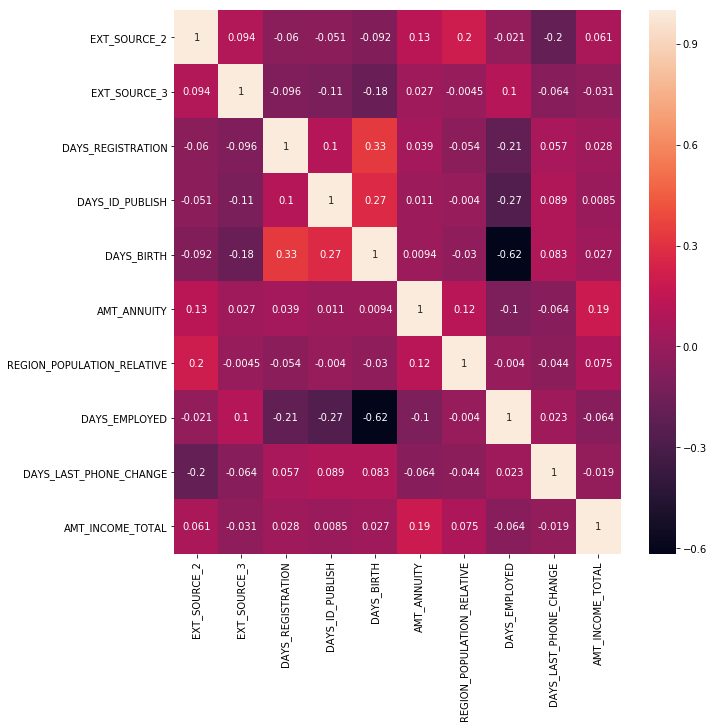

In [13]:
#相関係数行列を作成
df_train_corr = df_train[high_importance.index].corr()

#図を拡大する
plt.figure(figsize=(10,10))

#ヒートマップを作成
sns.heatmap(df_train_corr, annot = True)

In [14]:
# 相関係数が1の場合は、0でマスクする
masked_df_train_corr = df_train_corr.mask(df_train_corr == 1, 0)

# 各行で最大値をとる組み合わせ
high_corr = masked_df_train_corr.idxmax()

for high_corr_key in high_corr:
    if df_train_corr[high_corr_key][high_corr[high_corr_key]] > 0.001:
        print(high_corr_key + ' × ' + high_corr[high_corr_key])
        print(df_train_corr[high_corr_key][high_corr[high_corr_key]])

REGION_POPULATION_RELATIVE × EXT_SOURCE_2
0.19872498526687335
DAYS_EMPLOYED × EXT_SOURCE_3
0.10152492415450406
DAYS_BIRTH × DAYS_REGISTRATION
0.3319120822853529
DAYS_BIRTH × DAYS_REGISTRATION
0.3319120822853529
DAYS_REGISTRATION × DAYS_BIRTH
0.3319120822853529
AMT_INCOME_TOTAL × AMT_ANNUITY
0.19165657532606503
EXT_SOURCE_2 × REGION_POPULATION_RELATIVE
0.19872498526687335
EXT_SOURCE_3 × DAYS_EMPLOYED
0.10152492415450406
DAYS_ID_PUBLISH × DAYS_BIRTH
0.2726906624782627
AMT_ANNUITY × AMT_INCOME_TOTAL
0.19165657532606503


相関の高い組み合わせはなさそう

In [15]:
# 説明変数重要度上位10(重くて動かないので、テストデータで実施)
high_importance_df = pd.concat([X_test[high_importance.index], y_test], axis = 1)

high_importance_df

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_BIRTH,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE,AMT_INCOME_TOTAL,TARGET
162099,0.383537,0.535276,-1432.0,-3121,-10547,45000.0,0.018209,-196,0.0,675000.0,0
124718,0.616720,0.255332,-1040.0,-2566,-10962,20457.0,0.024610,-955,-450.0,49500.0,0
115649,0.494727,0.269286,-1409.0,-4644,-13941,13522.5,0.004960,-5334,-960.0,45000.0,0
116708,0.562284,0.665855,-1810.0,-2993,-15213,29956.5,0.008230,-1912,-1459.0,112500.0,0
191706,0.505321,0.719491,-7467.0,-1208,-17663,32089.5,0.010147,-1709,-1507.0,121500.0,0
91459,0.083686,0.586740,-9772.0,-1181,-13639,51543.0,0.031329,-3229,-1089.0,202500.0,0
47768,0.011339,0.289611,-2046.0,-2717,-15135,19926.0,0.018209,-616,-291.0,99000.0,0
51525,0.524594,0.345785,-4103.0,-524,-10862,36184.5,0.007274,-233,-1263.0,292500.0,1
29772,0.728482,0.535276,-524.0,-2702,-10717,33025.5,0.026392,-678,-780.0,90000.0,0
148356,0.408437,0.535276,-1905.0,-1940,-12441,60844.5,0.022800,-897,-828.0,112500.0,0


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


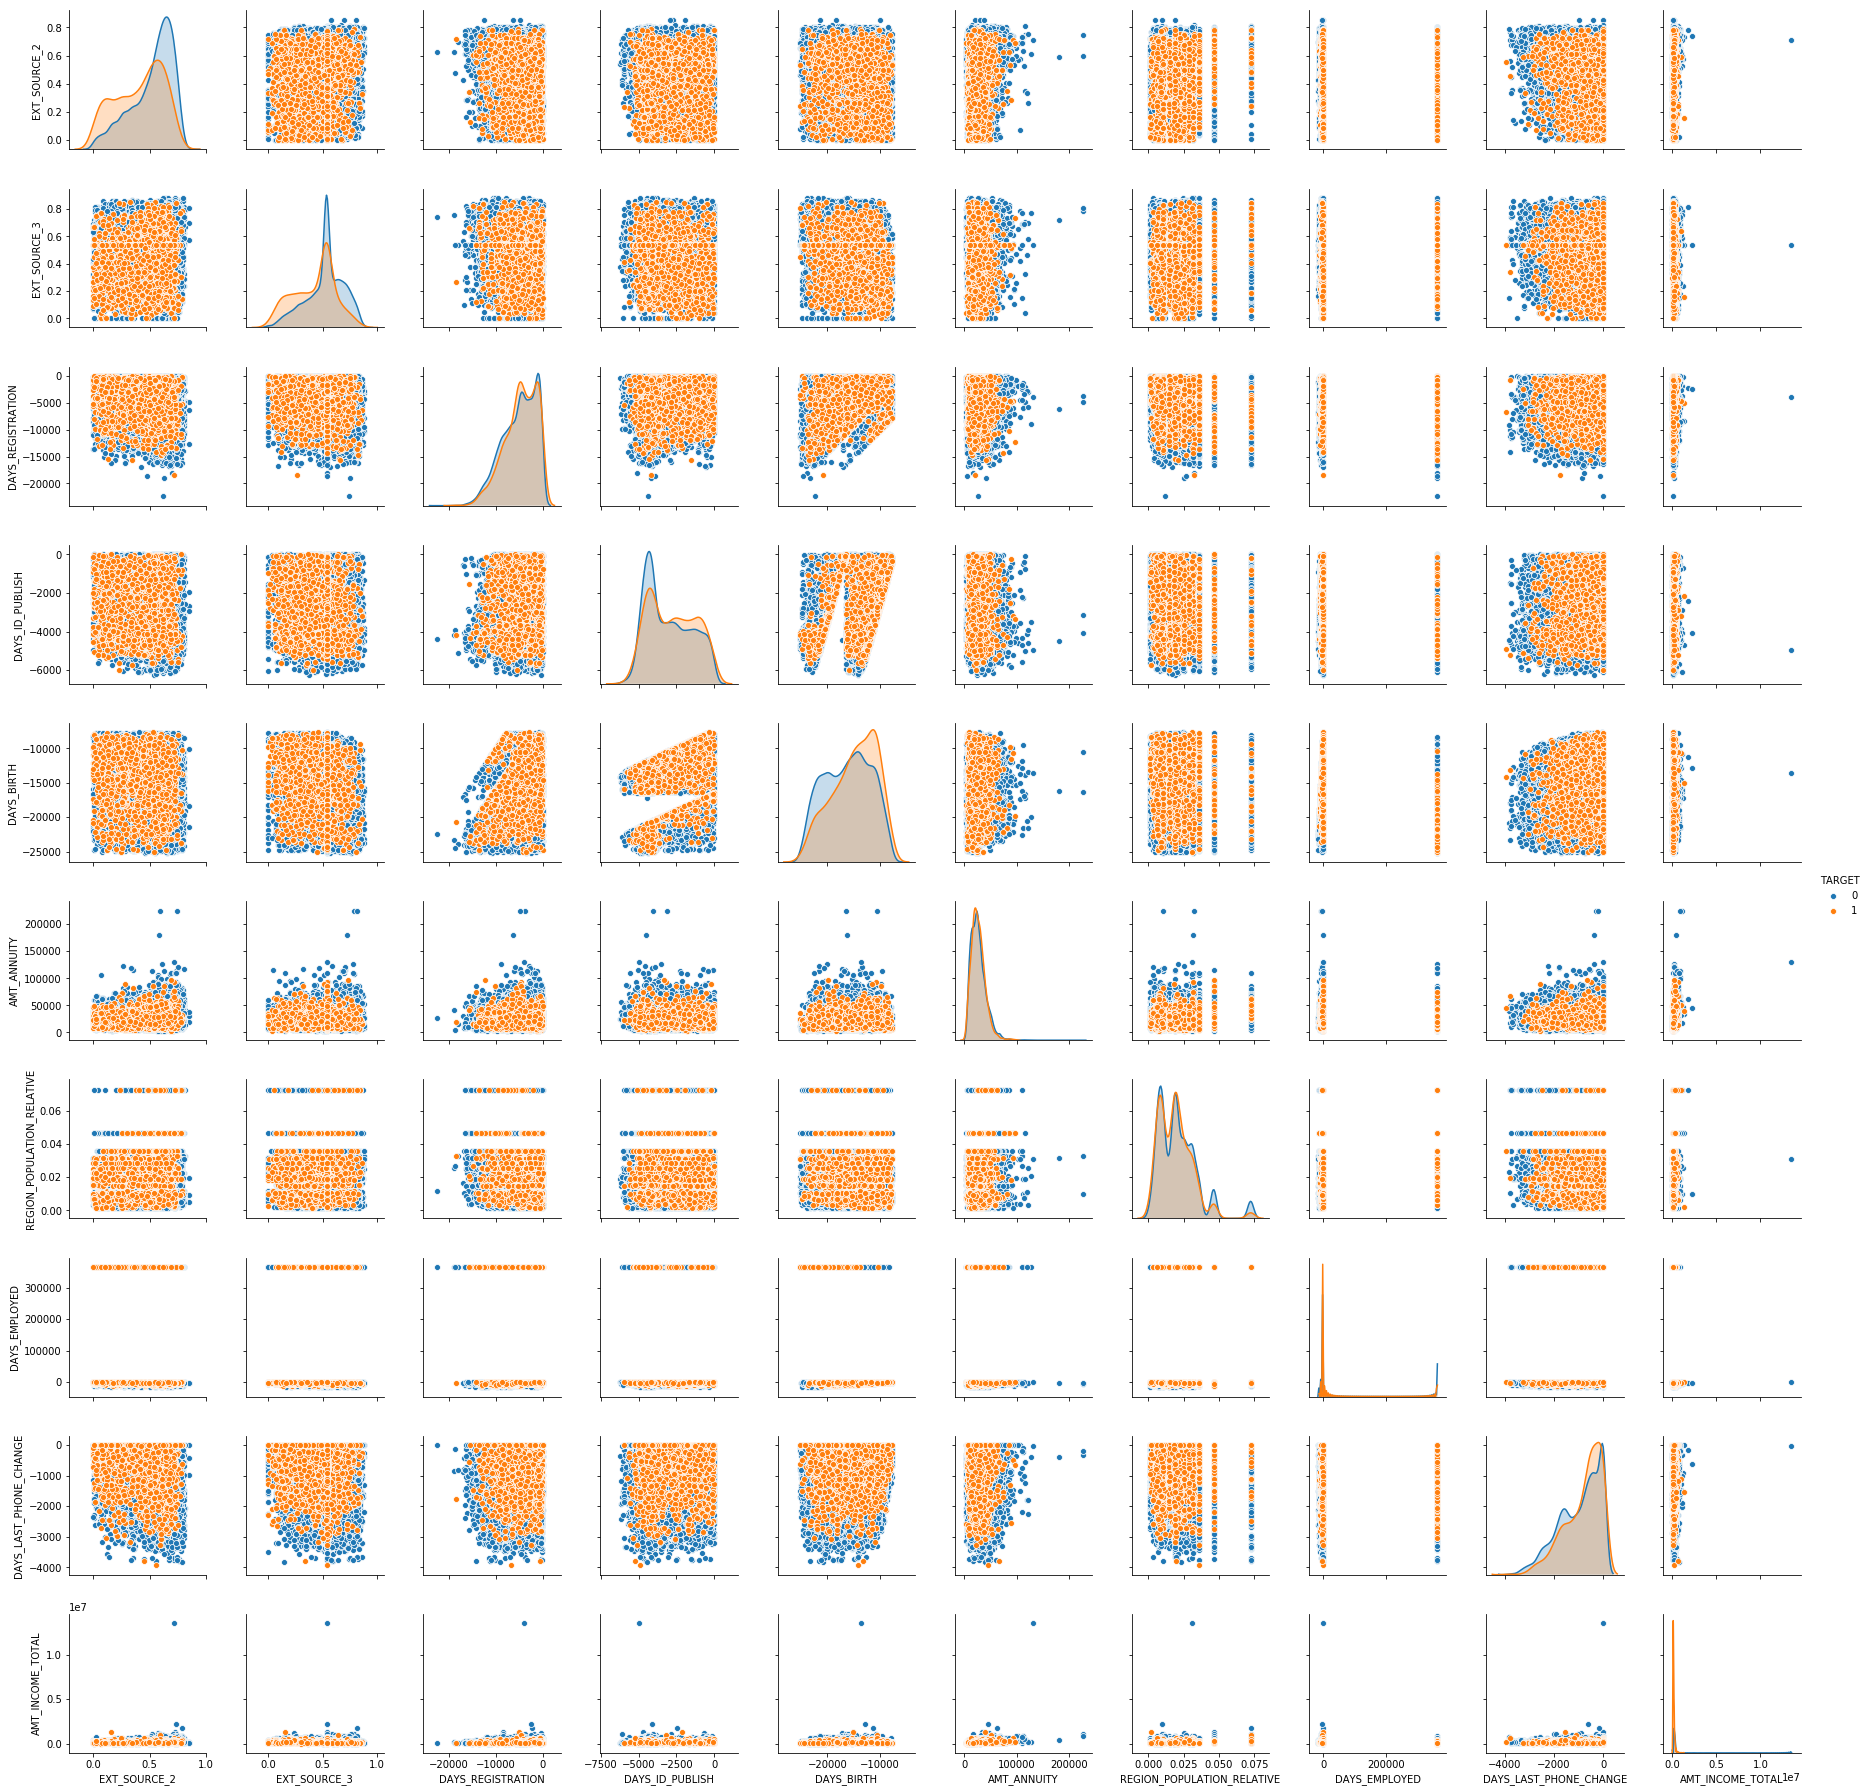

In [16]:
# TODO:見辛いのでなんとかしたい
sns.pairplot(high_importance_df, hue='TARGET',
                        vars=high_importance.index)

- 重要度top2からはTARGET間のあんまり偏りが読み取れなかった
- DAYS_REGISTRATION・DAYS_LAST_PHONE_CHANGE・AMT_ANNUITYあたりは結構偏ってる
- ヒストグラムから、対数変換は必要そう  

>重要度を見てみる  
- 欠損値の扱いについて削除を行うか、補填を行うか  
- データの文字列の扱いについて検討が必要（数値に置き換えるか、使用しないか、、）  

→ 欠損値をdropすると重要度がどうなるかみてみる

In [17]:
# application_train.csvの読み込み(対比したいのでdf_train2にする)
df_train2 = pd.read_csv('application_train.csv')

print('drop前column数' + str(len(df_train2.columns)))

# 2割以上欠損してるcolumnをdropしてみる
df_train2 = df_train.dropna(axis=1, thresh=int(len(df_train2)*0.8))

print('drop前column数' + str(len(df_train2.columns)))
print('drop前row数' + str(len(df_train2)))

df_train2 = df_train2.dropna()

print('drop後row数' + str(len(df_train2)))
df_train2.info()

drop前column数122
drop前column数116
drop前row数307511
drop後row数307511
<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 116 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(51)
memory usage: 274.5 MB


割と残ったのでこれを採用してやってみる
object型の列はいい感じに消えた

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# 説明変数
X2 = df_train2.drop(['SK_ID_CURR', 'TARGET'], axis = 1)

# 目的変数
y2 = df_train2['TARGET']

# 分割
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.05)

# インスタンス作成
regr = RandomForestRegressor(n_estimators = 10)

# 学習
regr = regr.fit(X_test2, y_test2)

# 重要度取得
feature_importance = regr.feature_importances_

# 重要度格納用
ser_feature_importance2 = pd.Series([])

# 重くなるのでテストデータで実施
for i, key in enumerate(X_test2):
    ser_feature_importance2[key] = feature_importance[i]

せっかくなので重要度を上位20まで比較してみる
- 欠損を中央値で埋めた場合

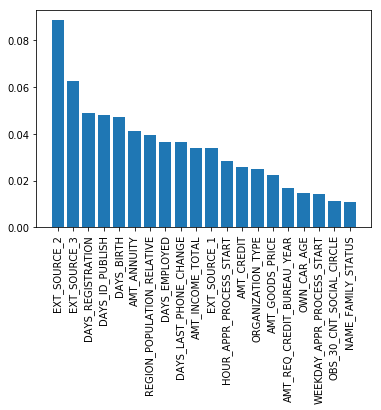

In [19]:
# 重要度上位20 - 欠損を中央値で埋めた場合
high_importance = ser_feature_importance.sort_values(ascending = False)[:20]

# 可視化
plt.bar(high_importance.index, high_importance.values)
plt.xticks(high_importance.index, rotation=90)
plt.show()


- 欠損値を消した場合

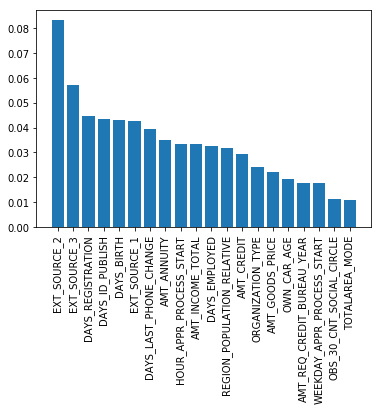

In [20]:
# 重要度上位20 - 欠損を消した場合
high_importance2 = ser_feature_importance2.sort_values(ascending = False)[:20]

plt.bar(high_importance2.index, high_importance2.values)
plt.xticks(high_importance2.index, rotation=90)
plt.show()

- 序列が少し変わったぐらいだった。。
- EXT_SOURCE_1が消えてしまってるので、欠損値は消すよりは置き換えとかのが良さそう  

以降中央値で欠損を埋めた場合のデータを採用する  
重要度top20は下記

In [21]:
print(high_importance.index[0:20])

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'DAYS_BIRTH', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE',
       'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE', 'AMT_INCOME_TOTAL',
       'EXT_SOURCE_1', 'HOUR_APPR_PROCESS_START', 'AMT_CREDIT',
       'ORGANIZATION_TYPE', 'AMT_GOODS_PRICE', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'OWN_CAR_AGE', 'WEEKDAY_APPR_PROCESS_START', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'NAME_FAMILY_STATUS'],
      dtype='object')


次は目的変数との相関係数が高いtop10を出してみる

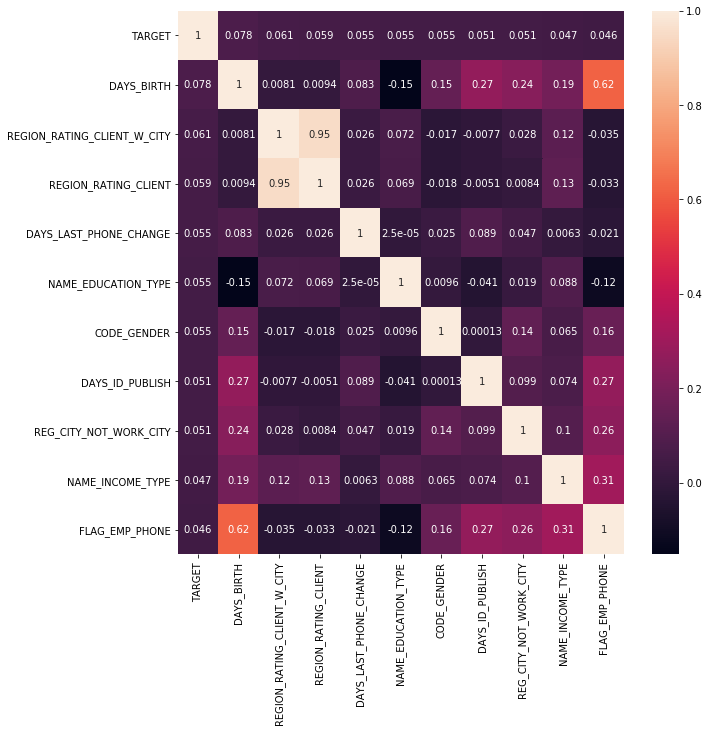

In [22]:
#相関係数行列を作成
corr_df_train = df_train.corr(method="pearson")

# 相関係数上位10
high_corr = corr_df_train.sort_values('TARGET', ascending=False)['TARGET'].index.values[0:11]

#相関係数行列を作成
df_train_corr = df_train[high_corr].corr()

#図を拡大する
plt.figure(figsize=(10,10))

#ヒートマップを作成
sns.heatmap(df_train_corr, annot = True)

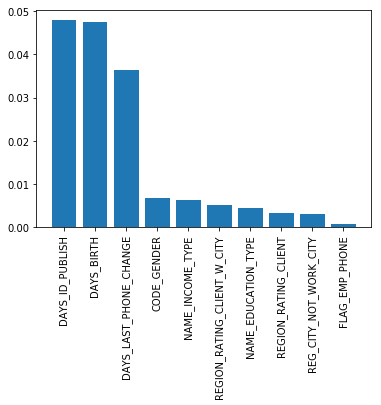

In [23]:
high_corr_importance = ser_feature_importance[high_corr].drop('TARGET').sort_values( ascending=False)

# 可視化
plt.bar(high_corr_importance.index, high_corr_importance.values)
plt.xticks(high_corr_importance.index, rotation=90)
plt.show()

- 目的変数との相関係数が高いものがそもそもない
- 相関係数top10の重要度をみると重要度top10に入ってるもの以外重要度が高くない  
→ 重要度10をそのまま採用して標準化して箱ひげ図を作ってみる  
(todo: forで複数プロットできなかった、、)

In [24]:
print(high_importance.index[0:10])

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'DAYS_BIRTH', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE',
       'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE', 'AMT_INCOME_TOTAL'],
      dtype='object')


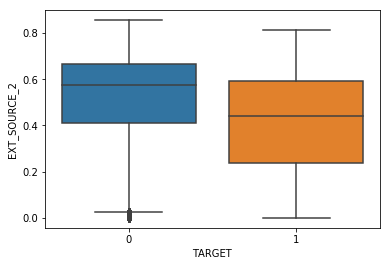

In [25]:
sns.boxplot(x='TARGET', y='EXT_SOURCE_2', data=df_train)

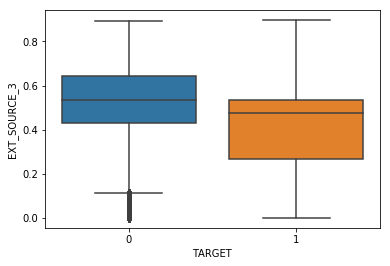

In [26]:
sns.boxplot(x='TARGET', y='EXT_SOURCE_3', data=df_train)

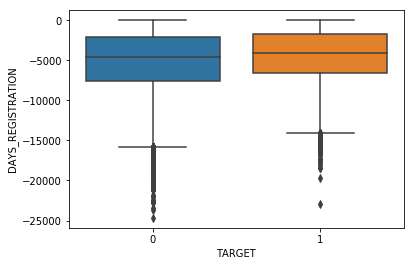

In [27]:
sns.boxplot(x='TARGET', y='DAYS_REGISTRATION', data=df_train)

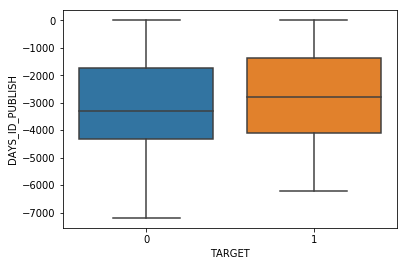

In [28]:
sns.boxplot(x='TARGET', y='DAYS_ID_PUBLISH', data=df_train)

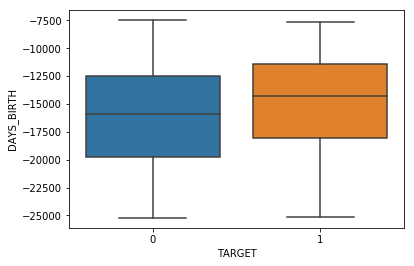

In [29]:
sns.boxplot(x='TARGET', y='DAYS_BIRTH', data=df_train)

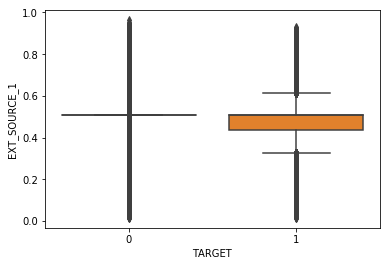

In [30]:
sns.boxplot(x='TARGET', y='EXT_SOURCE_1', data=df_train)

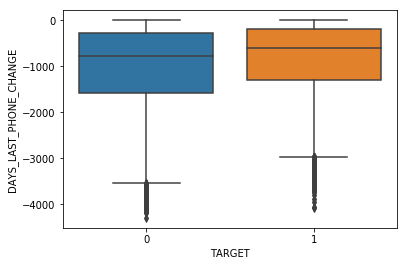

In [31]:
sns.boxplot(x='TARGET', y='DAYS_LAST_PHONE_CHANGE', data=df_train)

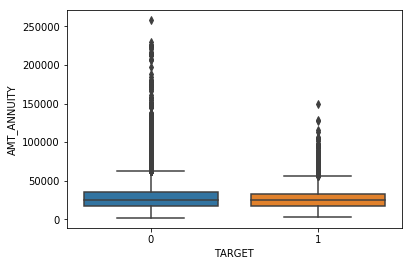

In [32]:
sns.boxplot(x='TARGET', y='AMT_ANNUITY', data=df_train)

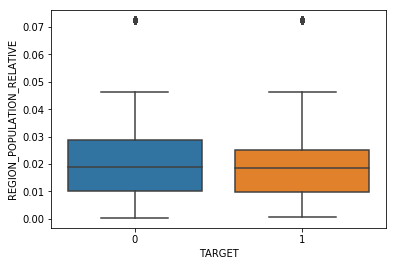

In [33]:
sns.boxplot(x='TARGET', y='REGION_POPULATION_RELATIVE', data=df_train)

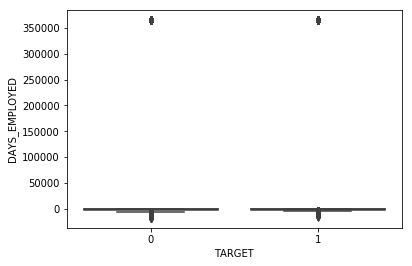

In [34]:
sns.boxplot(x='TARGET', y='DAYS_EMPLOYED', data=df_train)

EXT_SOURCEシリーズとDAYSシリーズに目的変数間の違いが結構みられたので  
この辺りの特徴量をピックアップしようかなと思った  
DAYS_EMPLOYEDは階級を設けるなどの加工が必要そう